The purpose of this notebook is to show that the same ML model can solve two completely different apps. The two apps are buying a car and solving the Or logic operator. This is supervised learning. The general approach to building a simple ML model is to get the data, scale the data if wanted, train the model, and then use the model. No testing nor validation is done in this notebook.

Note: This program assumes that an app has exactly two attributes to keep the coding more simple.

One of the ways to learn what works and what doesn't in machine learning is to experiment. For example, try without scaling and then with scaling.

In [173]:
# Set global parameters

myApp = 'Car buying'
#myApp = 'Or logic'

myScale = True # either True or False

In [174]:
# Import needed libraries

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [175]:
# Check global parameters

if myApp == 'Car buying':
    myDataset = 'carBuyData.csv'
    print('The car buying app it is')
elif myApp == 'Or logic':
    myDataset = 'orData.csv'
    print('The or logic app it is')
else:
    print('*** WARNING app ' + myApp + ' does not exist ***')
  
if myScale not in [True, False]:
    print('Set the scaling parameter to True or False')

The car buying app it is


In [176]:
# Input dataset

url = 'https://raw.githubusercontent.com/ithoughtitwas/csci370/main/data/' + myDataset
myDf = pd.read_csv(url)
print(myDf)

    Miles  Age  Buy
0   10000    1    1
1   25000    1    0
2   50000    2    0
3   40000    4    1
4   25000    2    1
5  100000    8    1
6   40000    2    0


Input data


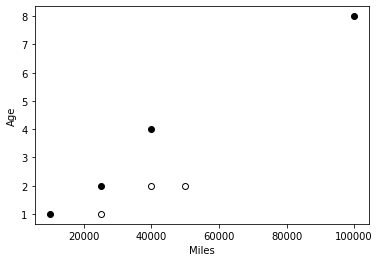

In [177]:
# Ready the training set (data) and visualize it

# This function creates a scatterplot for visualizing data. Until a legend is added,
# unfilled points are target 0 and filled ones are 1.
def DataVisual(X, Y, label):

    print(label)
    plt.xlabel(myDf.columns.values[0])
    plt.ylabel(myDf.columns.values[1])

    xAxis = X[:, 0].flatten()
    yAxis = X[:, 1].flatten()
    mark0 = dict(color='black', marker='o', mfc='none') # for 0
    mark1 = dict(color='black', marker='o') # for 1
    for k in range(len(xAxis)):
        if Y[k] == 0:
            plt.plot(xAxis[k], yAxis[k], **mark0)
        else:
            plt.plot(xAxis[k], yAxis[k], **mark1)

    plt.show()
    return

myData = myDf.to_numpy()
myX = myData[:, 0:2] # attributes
Xuse = myX.astype('float32') # in prep for ML
myY = myData[:, 2].flatten() # target
DataVisual(myX, myY, 'Input data')

Scaled data


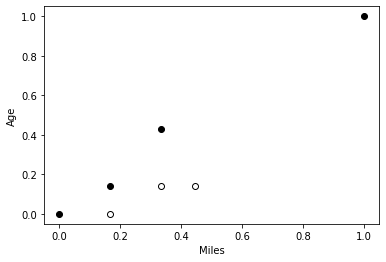

In [178]:
# Scale data, if desired, and visualize it

if myScale:
    myScaler = MinMaxScaler()
    Xscaled = myScaler.fit_transform(Xuse)
    Xuse = Xscaled
    DataVisual(Xuse, myY, 'Scaled data')
else:
    print('No scaling')

In [179]:
# Develop ML model

clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(4,2), max_iter=10000, random_state=1)
clf.fit(Xuse, myY)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Accuracy 
1.0
ML solution


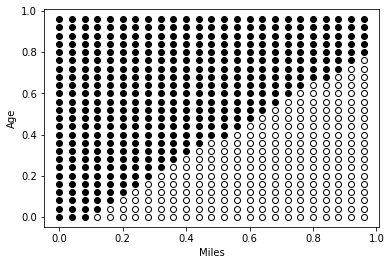

In [180]:
# Visualize the results

print('Accuracy \n' + str(clf.score(Xuse, myY)))

xs = Xuse[:, 0].flatten()
ys = Xuse[:, 1].flatten()

prec = 25
inc = max(xs) / prec
hits1 = []
for k in range(prec):
    hits1.append(min(xs) + inc * k)

inc = max(ys) / prec
hits2 = []
for k in range(prec):
    hits2.append(min(ys) + inc * k)

ans = np.array([[0, 0, 0]])
for x in hits1:
    for y in hits2:
        ansT = clf.predict([[x, y]])[0]
        ans = np.append(ans, [[x, y, ansT]], axis=0)
ans = ans[1:]

X = ans[:, 0:2]
Y = ans[:, -1:]
DataVisual(X, Y, 'ML solution')

In [181]:
# Use the app

if myApp == 'Car buying':
    me = myScaler.transform([[30000, 2]]) # 30,000 miles and 2 years old
    print('30,000 miles and 2 years old')
    if clf.predict(me)[0] == 0:
        print("Don't buy")
    else:
        print("Buy")

if myApp == 'Car buying':
    me = myScaler.transform([[40000, 2]]) # 30,000 miles and 2 years old
    print('40,000 miles and 2 years old')
    if clf.predict(me)[0] == 0:
        print("Don't buy")
    else:
        print("Buy")

if myApp == 'Or logic':
    me = myScaler.transform([[0, 1]]) # 0 or 1
    print('0 or 1')
    if clf.predict(me)[0] == 0:
        print('0')
    else:
        print('1')

30,000 miles and 2 years old
Buy
40,000 miles and 2 years old
Don't buy
